# Unlock the Secrets of Causal Inference with a Master Class in Validating Causal Models

## A step-by-step explanation of how to validate Directed Acyclic Graphs against the data in causal inference

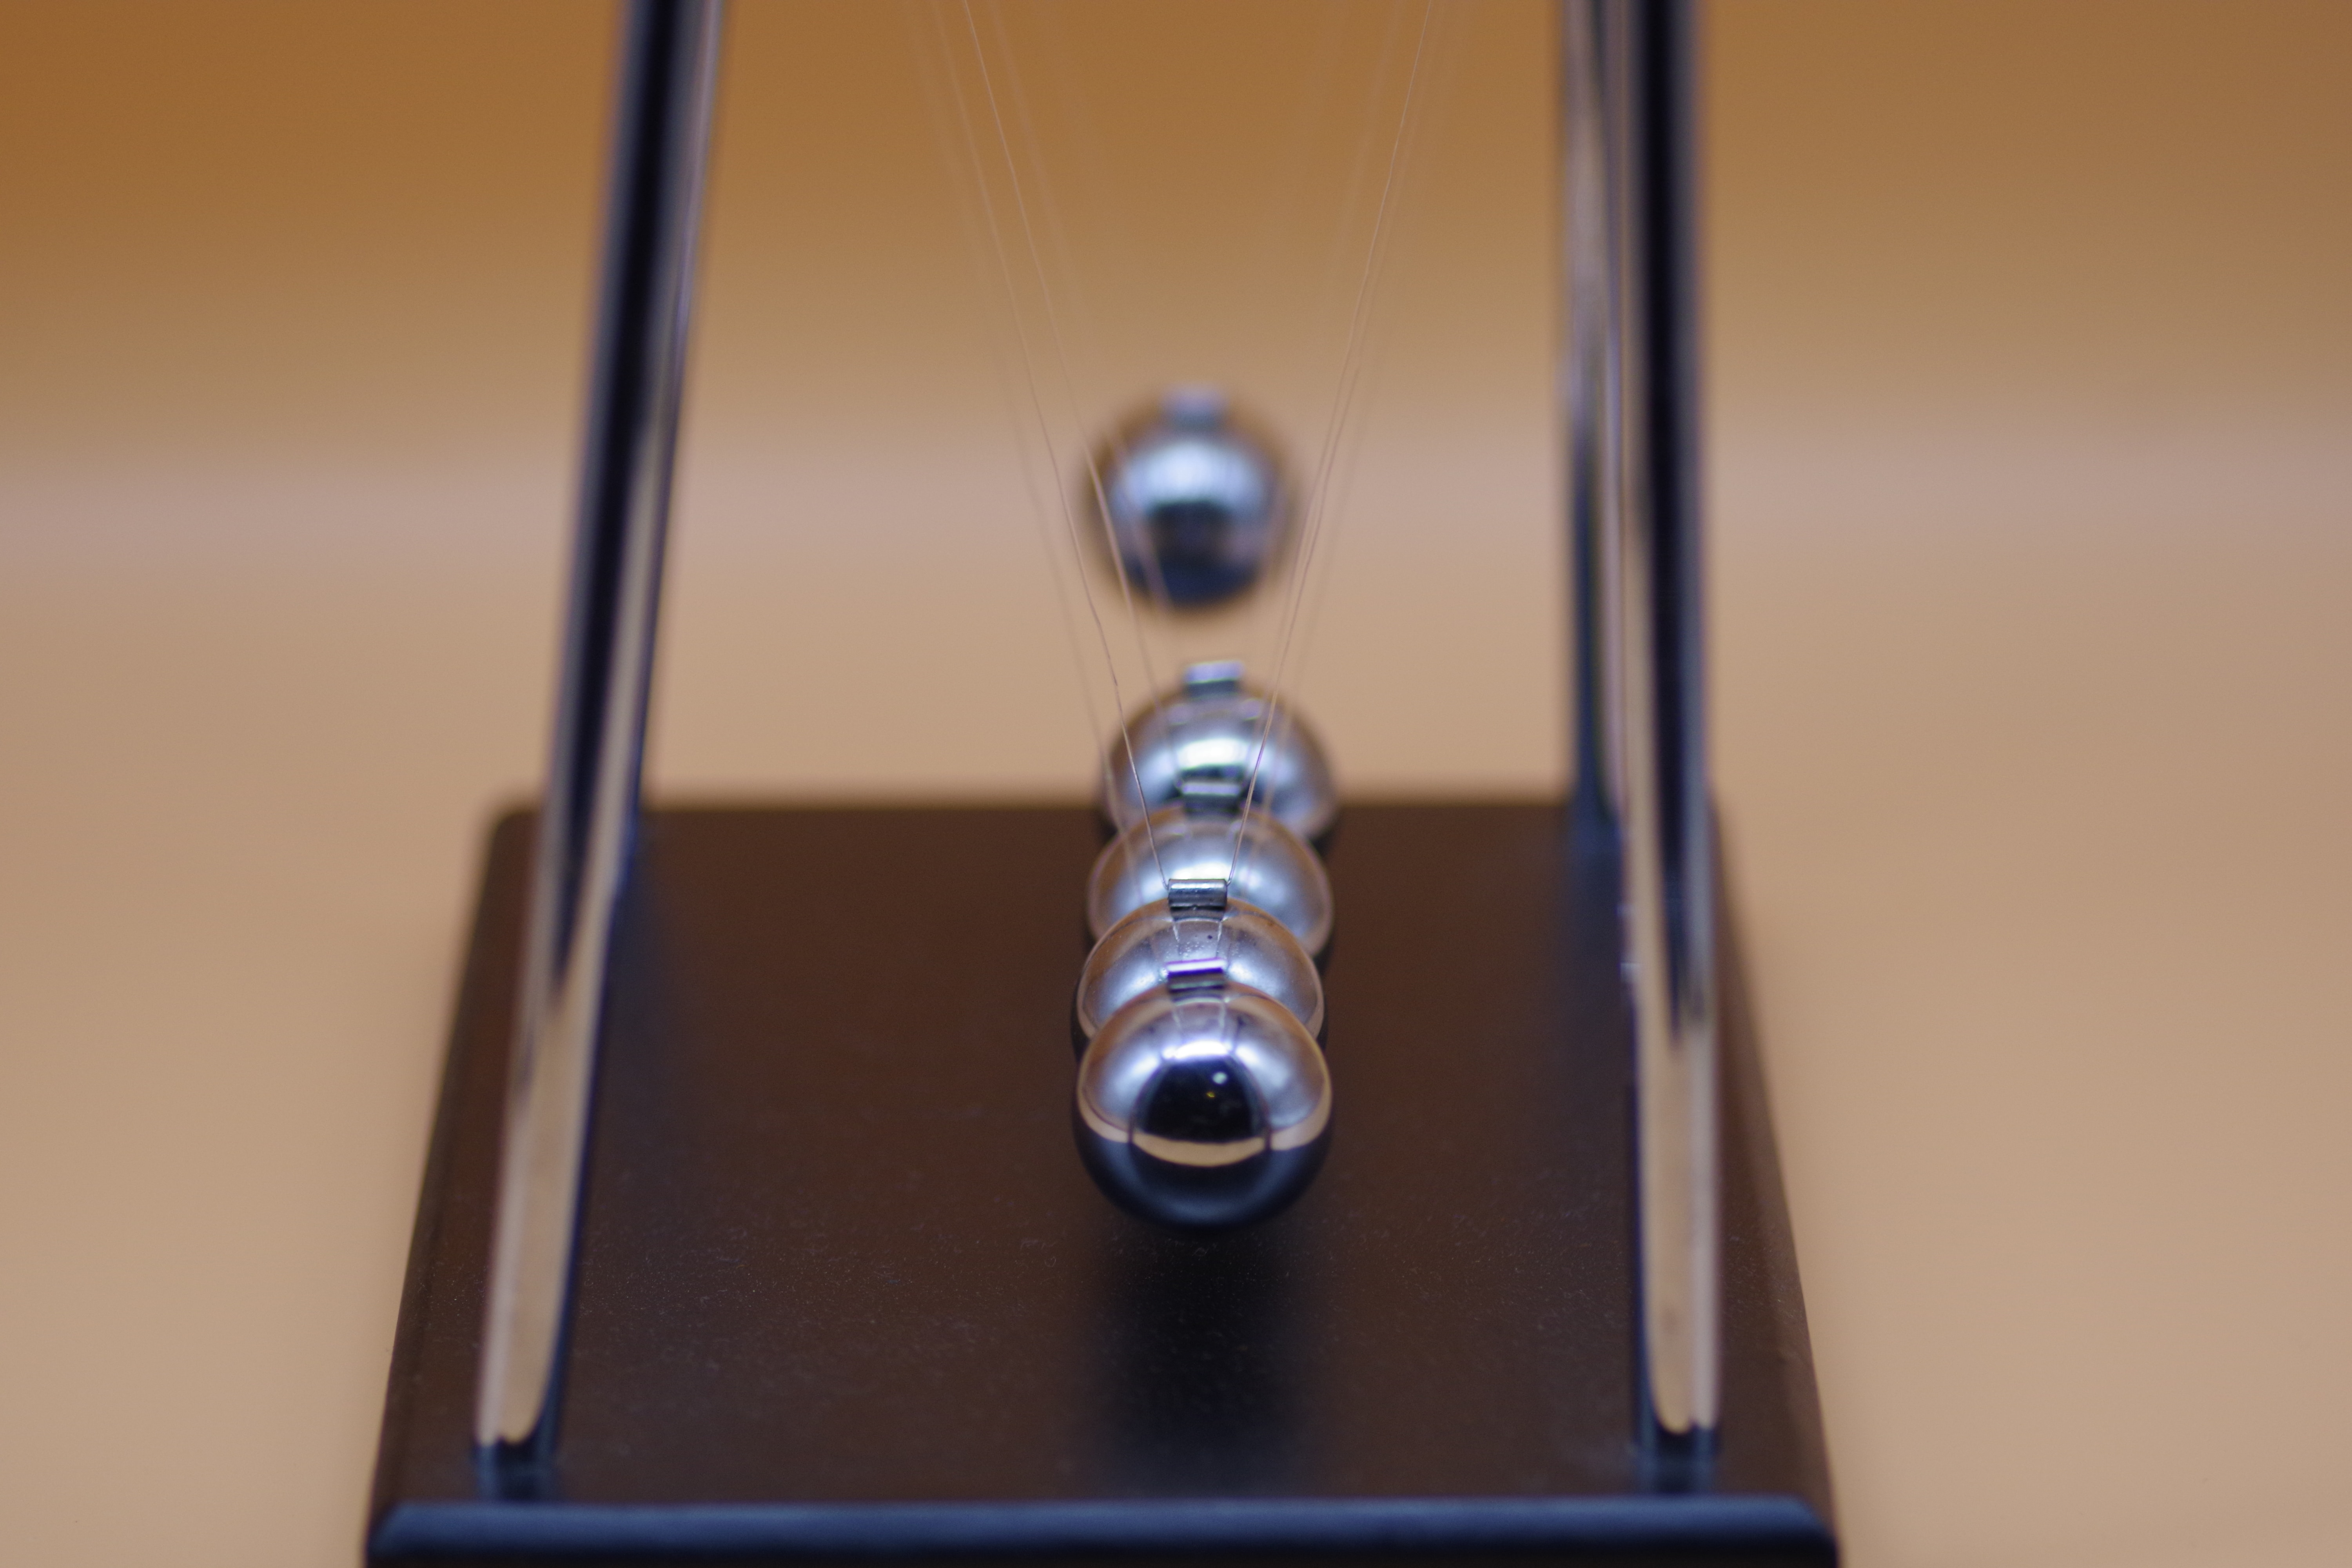

Photo by <a href="https://unsplash.com/@nadir_syzygy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Nadir sYzYgY</a> on <a href="https://unsplash.com/s/photos/cause?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## Overview

<b>The Opportunity</b>: Causal model validation offers the opportunity to validate a directed acyclic graph (DAG) that has been created using domain expertise against the observational data to highlight potential mistakes in the DAG which elevates DAG creation from art to science.

<b>The Challenge</b>: Causal model validation turns out to be difficult to do because there are so few explanations and examples of any appropriate methods and algorithms.

<b>The Solution</b>: This article will provide a master class is understanding causal validation, explain what it is and how it works with examples and provide a full implementation in Python.

## Introduction

Causal inference is a branch of data science that moves beyond prediction i.e. what will happen into exploring why something will happen. Knowing what will (or is likely) to happen through predictive machine learning algorithms has the potential to add significant value for organisations. For example, knowing what customers will churn can lead to interventions to encourage those customers to stay, however understanding why customers are likely to churn is even more powerful. If this insight existed it would enable an organisation to design and implement changes proactively so that customers become loyal and do not leave.

Causal inference as a data science technique offers this promise i.e. the ability not only to describe and predict but to prescribe what an organisation should do to maximise impact and outcomes. 

In order to do this one of the key components is a Directed Acyclic Graph (or DAG) that describes the causal relationships that exists within the data. A causal model then consists of the data, the DAG and a set of algorithms that can evaluate the prescriptive outcomes.

But where does the DAG come from? In practice there are 2 sources -

1. From domain expertise (i.e. what is in the heads of domain experts).
2. By utilising a set of specialist "causal discover"y algorithms.

Neither approach is fool-proof. Domain experts may have partial knowledge of their judgement can be affected by bias and noise whereas causal discovery algorithms are complex and are not reliable because the DAG adds knowledge that does not always exist in the data.

This article is concerned with validating a DAG i.e. the assumption is that we have some data and a DAG (that has been produced using one of the two methods) and that we want to prove or disprove that the DAG is correct.

## Getting Started

Let's start with a Directed Acyclic Graph and some data ...


In [1]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt

from icecream import ic
import pickle

from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import RegressionResultsWrapper

import sys
sys.path.insert(1, r'C:\\Users\\GHarr\\OneDrive - Lincoln College\\Python Projects\Data Science\\ghlibrary')

import dataframe_tools
from dag_tools import DirectedAcyclicGraph
from causal_tools import CausalModel

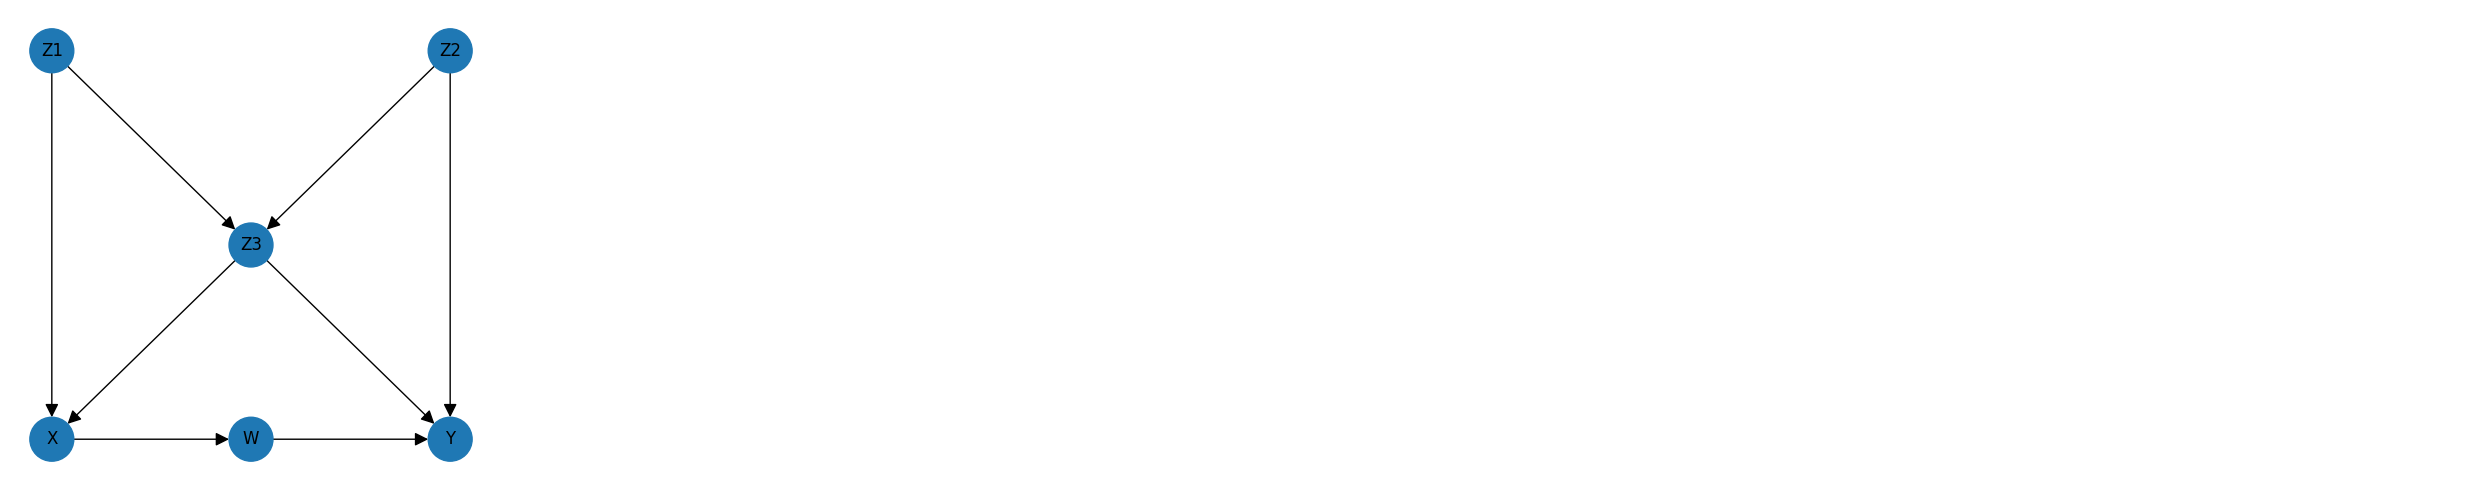

In [6]:
edges : list = [("Z1", "X"), ("Z1", "Z3"), ("Z3", "X"), ("Z3", "Y"), ("Z2", "Z3"), ("Z2", "Y"), ("X", "W"), ("W", "Y")]
pos : dict = {"X": [1, 1], "Z1": [1, 3], "W": [2, 1], "Z3": [2, 2], "Y": [3, 1], "Z2": [3, 3]}

dag = DirectedAcyclicGraph(treatment="X", outcome="Y", edges=edges, pos=pos)
dag.draw(grid_size=5)

In [4]:
df_data= pd.read_excel("data/causal_validation.xlsx")

causal_model = CausalModel(dag=dag)
causal_model.fit(X = df_data)


ic| 'CausalModel.fit'


In [5]:
causal_model.data


,Z1,Z2,Z3,X,W,Y
0,5.160531,6.171686,22.412524,55.460562,134.532706,325.174518
1,4.351538,8.639421,26.039305,59.501752,153.994093,378.513770
2,2.689276,5.420708,15.304620,33.471033,89.084443,227.468759
3,6.128481,5.518411,23.665671,55.509685,138.877951,351.831447
4,3.475086,5.096567,18.061514,46.319555,117.971337,297.657635
...,...,...,...,...,...,...
995,2.267526,6.163058,16.651465,33.195782,89.107410,224.368558
996,3.160171,5.390223,18.001620,40.502254,94.443341,248.848532
997,2.866823,4.396134,14.755553,36.436807,85.658380,215.420242
998,4.110973,4.824317,16.245673,41.458968,110.205456,252.289692


Please note that the data is entirely fictitious and was created by stating with the DAG and creating data that matches by applying a set of "structural equations" to create the data as follows -

- $Z1 = np.random.normal(np.random.uniform(1, 10), np.random.uniform(1, 2))$
- $Z2 = np.random.normal(np.random.uniform(1, 10), np.random.uniform(1, 2))$
- $Z3 = 2.5 \times Z1 + 3 \times Z2 + ε$
- $X = 3 \times Z1 + 1.5 \times Z3 + ε$
- $W = 2 \times X + ε$
- $Y = 1.5 \times Z3 + 2.5 \times Z2 + 2 \times W + ε$

Notes:
- The values for Z1 and Z2 are random, normal distributions with a random mean between 1 and 10 and a random standard deviation between 1 and 2.
- The randomness of the means and standard deviations just means that Z1 and Z2 are likely to be different to each other.
- The values for Z3, X, W and Y are calculated based on other factors, for example Z3 = 2.5 * Z1 + 3 x Z2.
- Each variable has an error term added represented by ε (epsilon).

The test data set must match the DAG because the various columns were calculated by from it. For example in the DAG X has input arrows from Z1 and Z3 and the formula used to create the test data was $X = 3 \times Z1 + 1.5 \times Z3 + ε$. This means that we can experiment with building an algorithm to implement causal validation and if it works it should validate the proposed DAG against the synthetic test data.

## Side Note
It should be noted that in the real world a directed acyclic graph cannot be 100% validated against a given data set. The reason is as follows ...
In our example DAG there is no arrow from Z1 to Z2 indicating that there is no causal relationship but what if Z1 and Z2 just happened to have very similar distirbutions by pure chance? In this case our causal validation algorithm might mistakenly conclude that that there should be a link from Z1 to Z2. For this reason any algorithm that is validating a DAG against a set of data can propose that some edges (links) could be missing from the DAG and some edges (links) in the DAG are candidates to be rmeoved, but these suggestions can never be 100% accurate or verfified.

With that in mind it can still be extremely useful to make these suggestions, hence we will continue in our quest to develop an algorithm to make these suggestions ...

## Approach

So how do we get started? Well, there are very few explanations of causal validation algorithms in the literature or online and there are even fewer examples that provide any source code to show how it has been done which presents a significant challenge.

